<a href="https://colab.research.google.com/github/Isrumk/Loan-default-prediction/blob/master/Loan_deafault_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge I attempt to come up with  model that predicts the likelihood of loan default.Steps undertaken to achieve this objective are laid out in the notebook.
I have used Colab notebook,three ML classifiers of Random foest,Decision and tree and Gradient boost.The proble at hand is a regession problem.
From the results bank balance and income was a significant predictor of loan default.It is also interesting to note that being a student or not was not enough predictor of loan default

In [0]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import pylab as pl

#1.0 Load dataset to colab environment and perform quick overview of the dataset

In [0]:
from google.colab import files
uploaded= files.upload()

Saving Default Rate.xlsx to Default Rate.xlsx


In [0]:
import io
import pandas as pd
df=pd.read_excel(io.BytesIO(uploaded['Default Rate.xlsx']))
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null int64
student    10000 non-null int64
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


#2.0 Replace categorical/string values with numbers int

In [0]:
#Replace categorical/string values with numbers int
df.default.replace(['No', 'Yes'], [0, 1], inplace=True)

In [0]:
df.student.replace(['No', 'Yes'], [0, 1], inplace=True)
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


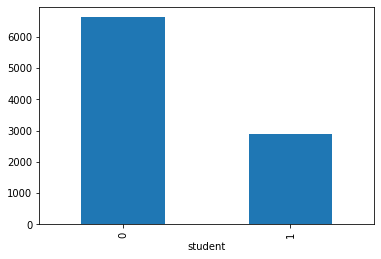

In [0]:
df.groupby('student')['balance'].nunique().plot(kind='bar')
plt.show()

In [0]:
#There are 2944 studentaccount holders in the dataset
df.student.value_counts()

0    7056
1    2944
Name: student, dtype: int64

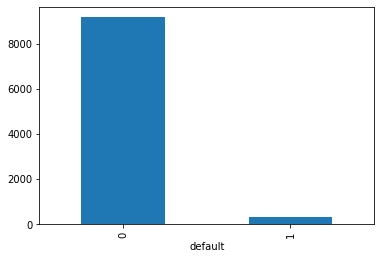

In [0]:
df.groupby('default')['balance'].nunique().plot(kind='bar')
plt.show()

In [0]:
#There are 333 defaulters in the dataset
df.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

#3.0 Separate target variable (deafault) from income and balance

In [0]:
#Separate target variable (deafault) from income and balance
X = df.loc[:, df.columns != "default"]
y = df.loc[:, "default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#4.0 Specify classifier parameters

In [0]:
#Set Random forest parameters
RF = ensemble.RandomForestClassifier(
    n_estimators=800,#The bigger the forest the better, there is small chance of overfitting here
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    max_features="auto",
  
)


In [0]:
#Perform prediction with RF
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

In [0]:
#Print classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2890
           1       0.67      0.25      0.37       110

    accuracy                           0.97      3000
   macro avg       0.82      0.62      0.68      3000
weighted avg       0.96      0.97      0.96      3000



In [0]:
#Install Scikit-plot to visualize the confusion matrix results
pip install  scikit-plot

In [0]:
import scikitplot as skplt

[[2876   14]
 [  82   28]]


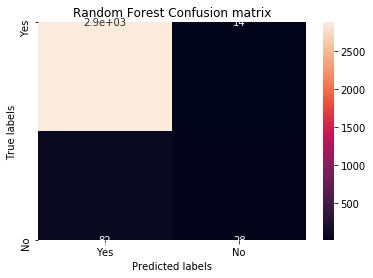

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     
RF_CM=confusion_matrix(y_test, y_pred_RF)
print(RF_CM)
ax= plt.subplot()
sns.heatmap(RF_CM, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Confusion matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

In [0]:
#Idetify feature importance in regards to the target variable
Varible_importance = RF.feature_importances_

In [0]:
Variables_col = X_test.columns
importance = pd.DataFrame(
    {"feature": Variables_col, "Degree_of_importance": RF.feature_importances_}
)

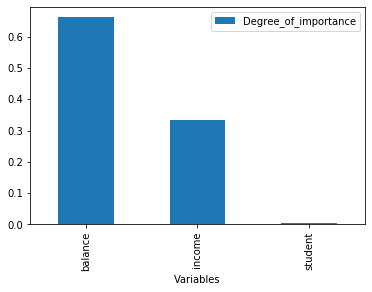

In [0]:
importance = pd.DataFrame(
    {"Variables": Variables_col[:], "Degree_of_importance": RF.feature_importances_[:]}
)
importance.sort_values(
    by="Degree_of_importance",
    ascending=False,
    inplace=True, 
)
importance[:20].plot(x="Variables", y="Degree_of_importance", kind="bar")

In [0]:
#Set Decision tree classifier parameters
DTC = tree.DecisionTreeClassifier(
    max_depth=5,
    criterion="gini",
    splitter="best",
    min_samples_split=2,
    min_samples_leaf=1,
)

In [0]:
model = DTC.fit(X_train, y_train)
y_pred_DTC = DTC.predict(X_test)

In [0]:
#Display Decision tree classification report
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2890
           1       0.67      0.35      0.46       110

    accuracy                           0.97      3000
   macro avg       0.82      0.67      0.72      3000
weighted avg       0.96      0.97      0.97      3000



[[2871   19]
 [  71   39]]


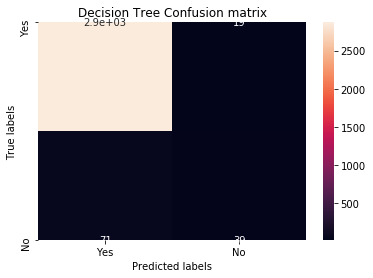

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     
DTC_CM = confusion_matrix(y_test, y_pred_DTC)
print(DTC_CM)
ax= plt.subplot()
sns.heatmap(DTC_CM, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree Confusion matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);

In [0]:
#Set Gradient boost classifier parameters
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(
    loss="deviance",
    criterion="friedman_mse",
    min_samples_split=2,
    min_samples_leaf=1,
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
)


In [0]:
model = GBC.fit(X_train, y_train)
y_pred_GBC = GBC.predict(X_test)

In [0]:
#Display Gradient boost classification report
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2890
           1       0.52      0.26      0.35       110

    accuracy                           0.96      3000
   macro avg       0.75      0.63      0.67      3000
weighted avg       0.96      0.96      0.96      3000



[[2863   27]
 [  81   29]]


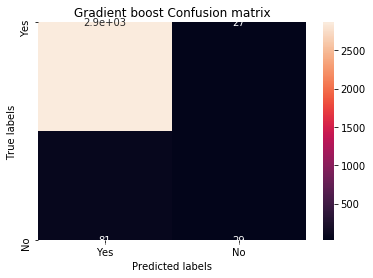

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     
CM_GBC = confusion_matrix(y_test, y_pred_GBC)
print(CM_GBC)
ax= plt.subplot()
sns.heatmap(CM_GBC, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Gradient boost Confusion matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No']);


#5.0 Conclusion
Balance was a great predictor of loan default followed by income.From the graph,being a student ot not was not a great predictor of loan default.What matters most as shown by the models is the balance and income